## Link Prediction in Dynamic Graphs for recommendation

***

Abstract: In this project we'll study the prediction of the future links in dynamic Graphs and
          implementing the data set using the algorithms and techniques of social network analysis (SNA)

Keywords :Social Network Analysis, Link Prediction,Dynamic Graphs , Recommendation,Neural Network

"Prediction is very difficult, especially if it's about the future."
                    
                       — Niels Bohr, Nobel laureate in Physics

###  Demarche :
- Introduction
- Description
- Cleaning Data
- Preparing Data
- Network Visualization
- Prediction
- Conlusion

##  Introduction

The Link prediction is an important task for analyzing social network which also has applications in other domains like retrieval, information, bioinformatics, and e-commerce.
Link prediction problem is studied in the supervised learning framework by treating it as an instance of binary classification These methods use the topological and semantic measures defined between nodes as features for learning classifiers

The methods of link prediction assign a connection weight score(x,y) to pairs of nodes x and y, based on the input graph $G_{collab}$, and then produce a ranked list in decreasing order of score(x,y). 

One common approach to this problem is collaborative ﬁltering , where the collective ratings users give to items are used to predict unseen ratings. This is commonly represented as an undirected bipartite graph, where observed ratings are weighted edges linking one user to one item, with the weight representing the rating value. Following recent advances on recommender systems using neural networks and inspired by collaborative ﬁltering


##  Description

We are going to study on a Data set of MovieLens 

This Data set consists of :

943 users,
1682 items
100 000 ratings.

The MovieLens Data Files:

- u.data : The full u data set, 100000 ratings by 943 users on 1682 items.Each user has rated at least 20 movies. 

- u.info : The number of users, items, and ratings in the u data set.

- u.item : Information about the items (movies)

- u.genre : A list of the genres.

- u.user  : Demographic information about the users

- u.occupation : A list of the occupations.

- u1.base,u1.test : The data sets u1.base and u1.test through u5.base and u5.test are 80%/20% splits of the u data into training  and test data.These data sets can be generated from u.data by mku.sh.
                  
- ua.base,ua.test,ub.base,ub.test : The data sets ua.base, ua.test, ub.base, and ub.test split the u data into a training set and a test set with exactly 10 ratings per user in the test set.

- allbut.pl : The script that generates training and test sets where all but n of a users ratings are in the training data.

- mku.sh : A shell script to generate all the u data sets from u.data.


 Firstly, we must to cleaning it and preparing its Data using the algorithms of Social Network Analysis,also extraction the pertinent parameters and finally predict the existence of link between the nodes of users and the nodes of items and the number of ratings that each user can give each movie  

## Cleaning Data

In [79]:
import pandas as pd
import os
#from google.colab import drive
#drive.mount('/content/gdrive')
#from google.colab import files

! git clone https://github.com/eddiae/Movielens-Dataset.git

#os.chdir('/content/gdrive/My Drive/Colab Notebooks/ML-100k/Unzipped Files/ml-100k')

#os.chdir('/home/marmar/Documents/SNA-Link-Prediction-Project/ml-100k')

fatal: destination path 'Movielens-Dataset' already exists and is not an empty directory.


Our first task is transforming the required data and make it comform and structured for use in our link prediction task. 

Lets clean the data by removing the NAN columns 

In [80]:
with open('u.item', encoding = "ISO-8859-1") as content:
    mCols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url']
    genres = ['unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 
          'film-noir',  'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
    mColsG = mCols + genres
    movies_info = pd.DataFrame(columns=mColsG)
    i = 0
    for x in content:
        x = x.split("|")
        x[-1] = x[-1][:-1]
        if x[1][-1] == ' ':
            x[1] = x[1][:-1]
        movies_info.loc[i] = [word if word!='' else "empty" for word in x]
        i = i + 1
movies_info['movie_id'] = movies_info['movie_id'].astype('int64')
movies_info[genres] = movies_info[genres].astype('int64')
movies_info.head(5).transpose()

,0,1,2,3,4
movie_id,1,2,3,4,5
movie_title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995)
release_date,01-Jan-1995,01-Jan-1995,01-Jan-1995,01-Jan-1995,01-Jan-1995
video_release_date,empty,empty,empty,empty,empty
imdb_url,http://us.imdb.com/M/title-exact?Toy%20Story%2...,http://us.imdb.com/M/title-exact?GoldenEye%20(...,http://us.imdb.com/M/title-exact?Four%20Rooms%...,http://us.imdb.com/M/title-exact?Get%20Shorty%...,http://us.imdb.com/M/title-exact?Copycat%20(1995)
unknown,0,0,0,0,0
action,0,1,0,1,0
adventure,0,1,0,0,0
animation,1,0,0,0,0
children,1,0,0,0,0


We can remark that the NAN values are on the column  'video_release_date' , we will drop this column 

In [0]:
if 'video_release_date' in movies_info.columns:
    movies_info = movies_info.drop('video_release_date', axis=1)

In [82]:
movies_info.head(5).transpose()

,0,1,2,3,4
movie_id,1,2,3,4,5
movie_title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995)
release_date,01-Jan-1995,01-Jan-1995,01-Jan-1995,01-Jan-1995,01-Jan-1995
imdb_url,http://us.imdb.com/M/title-exact?Toy%20Story%2...,http://us.imdb.com/M/title-exact?GoldenEye%20(...,http://us.imdb.com/M/title-exact?Four%20Rooms%...,http://us.imdb.com/M/title-exact?Get%20Shorty%...,http://us.imdb.com/M/title-exact?Copycat%20(1995)
unknown,0,0,0,0,0
action,0,1,0,1,0
adventure,0,1,0,0,0
animation,1,0,0,0,0
children,1,0,0,0,0
comedy,1,0,0,1,0


creating movie profile with '|' separated genres

In [83]:
movies_genres = movies_info.copy()
named = []
for i in range(0,len(movies_genres)):
    genre = ""
    for column in movies_genres.columns[5:]: 
        if (movies_genres.iloc[i][column] == 1):
            genre = genre + column + '|'
    genre = genre[:-1]
    named.append(genre)
movies_genres['genre_names'] = named
movies_genres['genre_names'] = movies_genres['genre_names'].astype('str')
movies_genres = movies_genres.drop(movies_genres.columns[list(range(4,23))], axis=1) 
movies_genres.head(5)

,movie_id,movie_title,release_date,imdb_url,genre_names
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,animation|children|comedy
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,action|adventure|thriller
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,thriller
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,action|comedy|drama
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),crime|drama|thriller


## Preparing Data

We begin by reading csv files 

### Getting users file

In [84]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|',
                    names=u_cols,encoding='latin-1')
print(users)

     user_id  age sex     occupation zip_code
0          1   24   M     technician    85711
1          2   53   F          other    94043
2          3   23   M         writer    32067
3          4   24   M     technician    43537
4          5   33   F          other    15213
5          6   42   M      executive    98101
6          7   57   M  administrator    91344
7          8   36   M  administrator    05201
8          9   29   M        student    01002
9         10   53   M         lawyer    90703
10        11   39   F          other    30329
11        12   28   F          other    06405
12        13   47   M       educator    29206
13        14   45   M      scientist    55106
14        15   49   F       educator    97301
15        16   21   M  entertainment    10309
16        17   30   M     programmer    06355
17        18   35   F          other    37212
18        19   40   M      librarian    02138
19        20   42   F      homemaker    95660
20        21   26   M         writ

In [85]:
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Getting ratings file:

In [86]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./u.data',
                      sep='\t', names=r_cols,encoding='latin-1')
print(ratings)

       user_id  movie_id  rating  unix_timestamp
0          196       242       3       881250949
1          186       302       3       891717742
2           22       377       1       878887116
3          244        51       2       880606923
4          166       346       1       886397596
5          298       474       4       884182806
6          115       265       2       881171488
7          253       465       5       891628467
8          305       451       3       886324817
9            6        86       3       883603013
10          62       257       2       879372434
11         286      1014       5       879781125
12         200       222       5       876042340
13         210        40       3       891035994
14         224        29       3       888104457
15         303       785       3       879485318
16         122       387       5       879270459
17         194       274       2       879539794
18         291      1042       4       874834944
19         234      

In [87]:
print(ratings.shape)
ratings.head()

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Getting items file:

In [88]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation','Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical',
          'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('./u.item', sep='|', names=i_cols,encoding='latin-1')
print(items)

      movie id                                        movie title  \
0            1                                   Toy Story (1995)   
1            2                                   GoldenEye (1995)   
2            3                                  Four Rooms (1995)   
3            4                                  Get Shorty (1995)   
4            5                                     Copycat (1995)   
5            6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
6            7                              Twelve Monkeys (1995)   
7            8                                        Babe (1995)   
8            9                            Dead Man Walking (1995)   
9           10                                 Richard III (1995)   
10          11                               Seven (Se7en) (1995)   
11          12                         Usual Suspects, The (1995)   
12          13                            Mighty Aphrodite (1995)   
13          14                    

In [89]:
print(items.shape)
items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Network Visualization

In [0]:
import matplotlib.pyplot as plt
import codecs
import networkx as nx
%matplotlib inline

In [0]:
G = nx.from_pandas_edgelist(ratings,source = 'user_id', target = 'movie_id',create_using=nx.DiGraph())

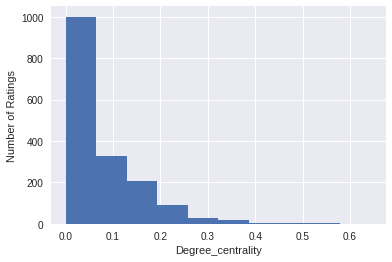

In [92]:
#Degree_centrality
degCentrality=nx.degree_centrality(G)
plt.hist(list(degCentrality.values()))
plt.xlabel('Degree_centrality')
plt.ylabel('Number of Ratings')
plt.show()

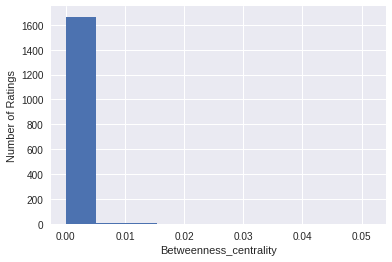

In [93]:
#Betweenness_centrality
bet_cen = nx.betweenness_centrality(G)
plt.hist(list(bet_cen.values()))
plt.xlabel('Betweenness_centrality')
plt.ylabel('Number of Ratings')
plt.show()

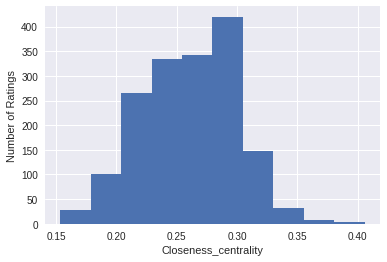

In [94]:
#Closeness_centrality
closeCentrality= nx.closeness_centrality(G)
plt.hist(list(closeCentrality.values()))
plt.xlabel('Closeness_centrality')
plt.ylabel('Number of Ratings')
plt.show()

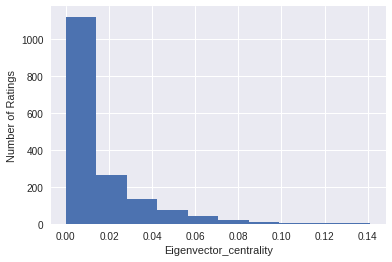

In [95]:
#Eigenvector_centrality
eigenvector_centrality=nx.eigenvector_centrality(G)
plt.hist(list(eigenvector_centrality.values()))
plt.xlabel('Eigenvector_centrality')
plt.ylabel('Number of Ratings')
plt.show()

In [96]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [100.0 * G.degree(v) for v in G]
node_size =  [v * 100 for v in betCent.values()]
plt.figure(figsize=(150,150))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.209482523202896,
 1.2045541727542877,
 -1.2028518828749657,
 1.206670216023922)

## Prediction

In [0]:

from surprise.model_selection import cross_validate, KFold
from surprise import Reader, Dataset, SVD, evaluate, accuracy
from sklearn import datasets, linear_model,tree
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


####  Collaborative Filtering (CF)

We see that the predictions are not so accurate since some genres differ by a lot. Hence, such a text mining approach would have been more useful, if we were given more details about the movies such as movie synopsis, cast, crew etc. This model doesn't give user-specific recommendations. Hence, to overcome this limitation arising due to limited descriptive data available in the MovieLens dataset, we compute user1's preference based on another similar user2's preference on the movies that the latter has reviewed but the former hasn't. This approach is called Collaborative Filtering (CF). We use Surprise library to implement CF.

In [100]:
from surprise.model_selection import KFold
# splitting data into 10-folds and performing SVD
Data = Dataset.load_from_df(user_movie_info[['user_id', 'movie_id', 'rating']], Reader())
#dividing the data into k-folds, here k=10
kf = KFold(n_splits=10)
#using SVD
algo = SVD()

NameError: ignored

Performing training, testing and calculating RMSE

In [0]:
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

checking the effectiveness of our approach by getting movie recommendations using CF - predicting the rating for user_id = 10 and movie_id = 336

In [0]:
trainset = data.build_full_trainset()
algo.fit(trainset)
algo.predict(10, 336, 3)

### Linear Regression

training the model

In [0]:
regression1 = linear_model.LinearRegression()
model_regression1 = regression1.fit(X_train, y_train)

Getting the ratings for some example movies

In [0]:
for i in range(1, len(final)):
    movie = final.iloc[i, 0]
    if(movie == 'Little Buddha (1993)'):
        mov1_feature = final.iloc[i,1:50]
    if(movie == 'Little Big League (1994)'):
        mov2_feature = final.iloc[i,1:50]
    if (movie == 'Metro (1997)'):
        mov3_feature = final.iloc[i, 1:50]
print("prediction for Little Buddha (1993)")
print(regression1.predict([mov1_feature]))
print("prediction for Little Big League (1994)")
print(regression1.predict([mov2_feature]))
print("prediction for Metro (1997)")
print(regression1.predict([mov3_feature]))
print("\n")

plotting true values v/s predictions of linear regression (top 100 values)

In [0]:
predictions = regression1.predict(X_test)
plt.scatter(y_test[0:100], predictions[0:100])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')

In [0]:
regression1_scores = cross_val_score(model_regression1, X_train, y_train, cv = 10)
print("cross validation scores: \n",regression1_scores)
print("testing score: {}".format(model_regression1.score(X_test, y_test)))
print("\n")

### Decision Tree

Training the model

In [0]:
dtree = tree.DecisionTreeRegressor()
model_dt = dtree.fit(X_train, y_train)

Getting the ratings for some example movies

In [0]:
for i in range(1, len(final)):
    movie = final.iloc[i, 0]
    if(movie == 'Little Buddha (1993)'):
        mov1_feature = final.iloc[i,1:50]
    if(movie == 'Little Big League (1994)'):
        mov2_feature = final.iloc[i,1:50]
    if (movie == 'Metro (1997)'):
        mov3_feature = final.iloc[i, 1:50]
print("prediction for Little Buddha (1993)")
print(dtree.predict([mov1_feature]))
print("prediction for Little Big League (1994)")
print(dtree.predict([mov2_feature]))
print("prediction for Metro (1997)")
print(dtree.predict([mov3_feature]))
print("\n")

Performing 10-fold CV and checking the effectiveness of the model on test data

In [0]:
dt_scores = cross_val_score(model_dt, X_train, y_train, cv = 10)
print("cross validation scores: \n",dt_scores)
print("testing score: {}".format(model_dt.score(X_test, y_test)))
print("\n")

We observe that the collaborative filtering is based only on how similar users have rated the movie so it doesn't use all the attributes of each review for a movie
The linear regression is performing match words than decision tree model due to inherent non linearity of the dataset also the decision tree model has higher cross Validation scores and gives accurate prediction for the ratings of the three movies taken 

### 6 . Conclusion